In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

C:\Users\mural\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_excel('transaction.xlsx')

In [4]:
df.head().T

,0,1,2,3,4
status,authorized,authorized,authorized,authorized,authorized
card_present_flag,1,0,1,1,1
bpay_biller_code,NaN,NaN,NaN,NaN,NaN
account,ACC-1598451071,ACC-1598451071,ACC-1222300524,ACC-1037050564,ACC-1598451071
currency,AUD,AUD,AUD,AUD,AUD
long_lat,153.41 -27.95,153.41 -27.95,151.23 -33.94,153.10 -27.66,153.41 -27.95
txn_description,POS,SALES-POS,POS,SALES-POS,SALES-POS
merchant_id,81c48296-73be-44a7-befa-d053f48ce7cd,830a451c-316e-4a6a-bf25-e37caedca49e,835c231d-8cdf-4e96-859d-e9d571760cf0,48514682-c78a-4a88-b0da-2d6302e64673,b4e02c10-0852-4273-b8fd-7b3395e32eb0
merchant_code,NaN,NaN,NaN,NaN,NaN
first_name,Diana,Diana,Michael,Rhonda,Diana


In [5]:
df_trial = df.groupby("customer_id").mean().reset_index()
df_trial.head(2)

,customer_id,card_present_flag,merchant_code,balance,age,amount
0,CUS-1005756958,0.812500,0.0,2275.852055,53,222.862603
1,CUS-1117979751,0.826923,0.0,9829.929000,21,339.843700


In [6]:
df['txn_description'].value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

In [7]:
df_salary = df.loc[df['txn_description'] == 'PAY/SALARY'].groupby('customer_id').agg({'amount': [('Average of salary','mean')]})
df_salary.columns = df_salary.columns.droplevel()
df_salary = df_salary.reset_index()
df_salary.head(2)

,customer_id,Average of salary
0,CUS-1005756958,970.47
1,CUS-1117979751,3578.65


In [8]:
complete_df = pd.merge(df, df_salary, on = 'customer_id')

In [9]:
complete_df.head(2)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,Average of salary
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,1013.67
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,1013.67


In [10]:
# Keeping only necessary columns
complete_df = complete_df[['balance','age','Average of salary','customer_id','txn_description','amount']]

# Null Value Check

In [11]:
complete_df.isnull().sum()

balance              0
age                  0
Average of salary    0
customer_id          0
txn_description      0
amount               0
dtype: int64

In [12]:
complete_df.shape

(12043, 6)

# Analysis

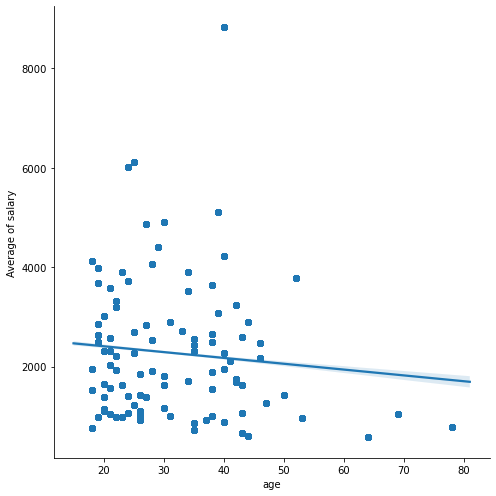

In [13]:
sns.lmplot("age", "Average of salary", data=complete_df, height= 7)

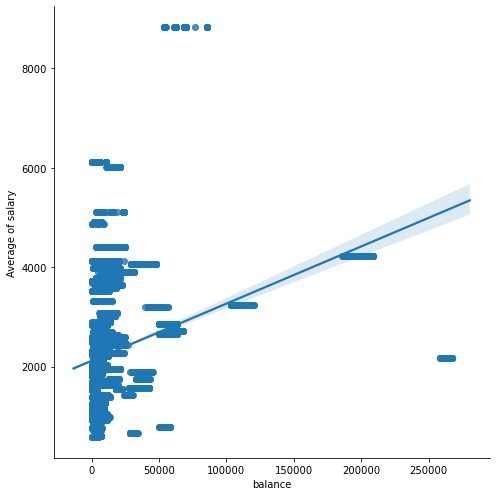

In [14]:
sns.lmplot("balance", "Average of salary", data=complete_df,height = 7)

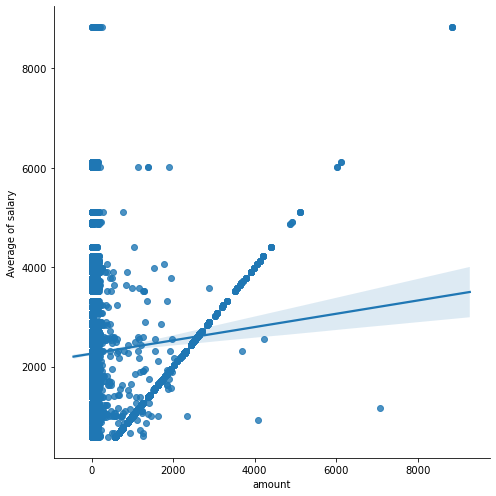

In [15]:
sns.lmplot('amount','Average of salary',height=7, data= complete_df)

# Feature Engineering

In [16]:
pos = complete_df[complete_df["txn_description"]==("POS"or"SALES-POS")].groupby("customer_id").agg({'amount': [('POS','mean')]})
pos.columns = pos.columns.droplevel()
pos = pos.reset_index()

payment = complete_df[complete_df["txn_description"]==("PAYMENT")].groupby("customer_id").agg({'amount': [('payment','mean')]})
payment.columns = payment.columns.droplevel()
payment = payment.reset_index()

complete_df = pd.merge(complete_df, pos, on = 'customer_id')
complete_df = pd.merge(complete_df, payment, on = 'customer_id')

In [17]:
complete_df.head(2)

,balance,age,Average of salary,customer_id,txn_description,amount,POS,payment
0,35.39,26,1013.67,CUS-2487424745,POS,16.25,18.652394,97.941176
1,21.20,26,1013.67,CUS-2487424745,SALES-POS,14.19,18.652394,97.941176


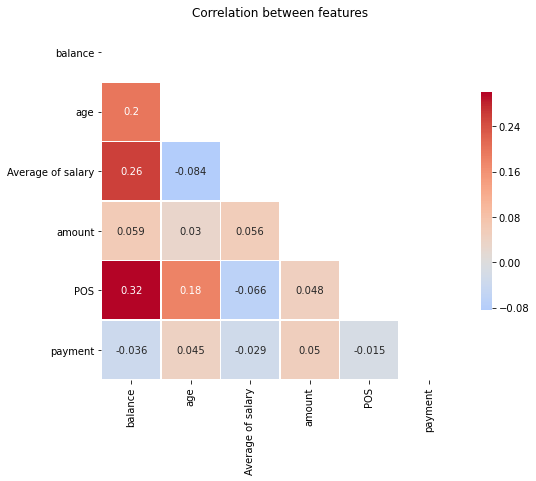

In [19]:
mask = np.zeros_like(complete_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(8,8))

# Building heatmap
sns.heatmap(complete_df.corr() ,vmax=.3 , center=0 , cmap='coolwarm',
            square=True , linewidths=.5 , cbar_kws={'shrink': .5}, 
            annot = True, mask = mask)
plt.title("Correlation between features")
plt.show()

# Modelling

In [20]:
X = complete_df[[ 'balance','age','POS', 'Average of salary', 'payment']]
y = complete_df['Average of salary']

In [21]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

## Linear Regression

In [20]:
lr = LinearRegression()
result = lr.fit(X_train, y_train)

In [21]:
y_pred=result.predict(X_test)

In [22]:
RMSE = mean_squared_error(y_test, y_pred, squared=False)

In [23]:
print("RMSE of Linear Regression is: ",RMSE)

RMSE of Linear Regression is:  8.582641376189301e-12


## Decision Tree

In [24]:
dt = DecisionTreeRegressor()

dt.fit(X_train, y_train)
dt.score(X_train, y_train)

1.0

In [25]:
dt.predict(X_test)
dt.score(X_test, y_test)

1.0

In [26]:
y_pred_dt=dt.predict(X_test)
y_pred_dt

array([1630.36,  996.24,  982.71, ..., 4863.62, 4132.23, 1002.13])

In [27]:
RMSE = mean_squared_error(y_test, y_pred_dt, squared=False)
print("RMSE of Decision Tree is: ",RMSE)

RMSE of Decision Tree is:  4.3732826139192735e-12


<font color = 'blue'>Inferences</font>

* Decsion Tree performed a bit better than Linear Regression
* A bigger dataset with more number of customer is needed to increase the accuracy of the model.
* We cannot use these models in industry because of high error rate. The model can proform better with more data and more analysis.